# Iris Classification Problem

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load data
data = pd.read_csv("data/iris.data").values
X = data[:,0:4]
y = data[:, 4]

In [21]:
def labelSerialize(s):
    if s == 'Iris-setosa':
        return 0
    if s == 'Iris-versicolor':
        return 1
    if s == 'Iris-virginica':
        return 2

In [22]:
# Preprocessing to output labels
mapFunc = np.vectorize(labelSerialize)
y = mapFunc(y)

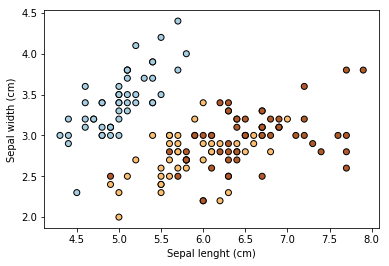

In [23]:
# Plot dataset according to two first parameters
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal lenght (cm)')
plt.ylabel('Sepal width (cm)')
plt.show()

## 1. Logistic Regression Model

In [33]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=20)

# Splitting training examples into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(
        X_train, y_train, test_size=0.25, random_state=20)

In [34]:
# Train 30 models on training set by modifying C parameter
# Most accurate model on cross-validation set is chosen
# to be tested on test set
C_range = [2**i for i in range(1, 30)]
C_scores = []

for c in C_range:
    clf = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial', C=c).fit(X_train, y_train)
    C_scores.append(clf.score(X_cv, y_cv))

In [36]:
# Get best model parameter
C_max = C_range[np.argmax(C_scores)]
clf = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial', C=C_max).fit(X_train, y_train)

# Evaluate score on test set
print('Test set score:', clf.score(X_test, y_test))

Test set score: 0.966666666667


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      0.91      0.95        11
          2       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30



In [28]:
# Using LogisticRegressionCV model
from sklearn.linear_model import LogisticRegressionCV

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=0)

# Logistic Regression model with built-in cross-validation
# Uses Stratified K-Fold, with 'cv' number of folds
clf = LogisticRegressionCV(cv=5, random_state=0,
                           multi_class='multinomial').fit(X_train, y_train)

print('Test set score:', clf.score(X_test, y_test))

Training set score: 0.977528089888
Test set score: 0.933333333333


## 2. Kernel SVM Model

In [29]:
# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=12)

# Splitting training examples into training and cross-validation sets
X_train, X_cv, y_train, y_cv = train_test_split(
        X_train, y_train, test_size=0.25, random_state=12)

In [30]:
from sklearn import svm

poly_deg = [i for i in range(1, 11)]
scores = []

# Train multiple models with different degrees for cross-validation
for deg in poly_deg:
    svm_clf = svm.SVC(kernel='poly', degree=deg).fit(X_train, y_train)
    scores.append(svm_clf.score(X_cv, y_cv))

In [31]:
# Get polynomial degree with best score
max_deg = poly_deg[np.argmax(scores)]

svm_clf = svm.SVC(kernel='poly',
                  degree=max_deg).fit(X_train, y_train)

# Test model on test set
print('Test score:', svm_clf.score(X_test, y_test)) # Wow

Test score: 1.0


In [37]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         8
          1       1.00      0.91      0.95        11
          2       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30

